<a href="https://colab.research.google.com/github/siddhantjain07/DeepLearning/blob/master/LargeCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading datasets - Transforming images
2. VGG-16 with modification to network head
3. Using pre-trained models
4. Storing intermediate models
5. Resnet
6. Inception v3


##Setup


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optimizer

import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


##Datasets, Transforms, and Visualizations

In [3]:
transform_train = transforms.Compose([
  transforms.RandomResizedCrop(224),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
  transforms.RandomResizedCrop(224),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))        #(mean_r, mean_g, mean_b), (std_deviation_r, std_dev_g, std_dev_b)  -> i.e values lie between [0,1]
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True,
                                       transform=transform_train)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
num_classes = 10
batch_size = 4

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [8]:
def imshow(img, title):
  npimg = img.numpy() / 2 + 0.5
  plt.figure(figsize=(batch_size, 1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.title(title)
  plt.show()


In [9]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

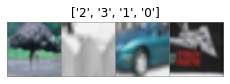

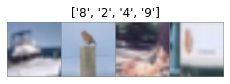

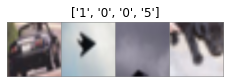

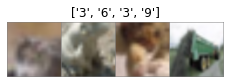

In [10]:
for i in range(4):
  show_batch_images(trainloader)

##VGG-16

In [11]:
from torchvision import models

In [ ]:
vgg = models.vgg16_bn()

In [ ]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [ ]:
print(vgg.avgpool)

AdaptiveAvgPool2d(output_size=(7, 7))


In [ ]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [ ]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

##Train CIFAR

In [12]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [13]:
def evaluation(dataloader, model):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct/total

In [ ]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optimizer.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.51
Iteration: 100/3125, Loss: 2.57
Iteration: 200/3125, Loss: 2.59
Iteration: 300/3125, Loss: 2.29
Iteration: 400/3125, Loss: 2.21
Iteration: 500/3125, Loss: 2.26
Iteration: 600/3125, Loss: 2.20
Iteration: 700/3125, Loss: 2.26
Iteration: 800/3125, Loss: 2.33
Iteration: 900/3125, Loss: 2.33
Iteration: 1000/3125, Loss: 2.30
Iteration: 1100/3125, Loss: 2.22
Iteration: 1200/3125, Loss: 2.18
Iteration: 1300/3125, Loss: 2.32
Iteration: 1400/3125, Loss: 2.16
Iteration: 1500/3125, Loss: 2.30
Iteration: 1600/3125, Loss: 2.32
Iteration: 1700/3125, Loss: 2.19
Iteration: 1800/3125, Loss: 1.87
Iteration: 1900/3125, Loss: 2.11
Iteration: 2000/3125, Loss: 2.31
Iteration: 2100/3125, Loss: 1.85
Iteration: 2200/3125, Loss: 2.09
Iteration: 2300/3125, Loss: 2.25
Iteration: 2400/3125, Loss: 2.17
Iteration: 2500/3125, Loss: 1.77
Iteration: 2600/3125, Loss: 2.05
Iteration: 2700/3125, Loss: 2.00
Iteration: 2800/3125, Loss: 1.93
Iteration: 2900/3125, Loss: 1.88
Iteration: 3000/3125, 

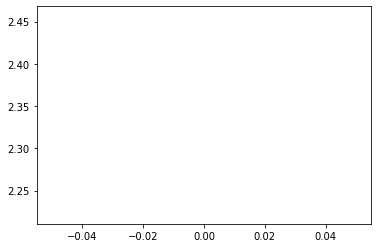

In [ ]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' %(i, n_iters, loss.item()))

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader, vgg), evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()

##Freezing the Convolutional Layer

In [14]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
vgg = models.vgg16_bn(pretrained=True)

In [ ]:
for param in vgg.parameters():
  param.requires_grad = False

In [ ]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [ ]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [ ]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optimizer.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.23
Iteration: 100/3125, Loss: 1.16
Iteration: 200/3125, Loss: 2.01
Iteration: 300/3125, Loss: 2.01
Iteration: 400/3125, Loss: 1.64
Iteration: 500/3125, Loss: 2.27
Iteration: 600/3125, Loss: 0.90
Iteration: 700/3125, Loss: 2.39
Iteration: 800/3125, Loss: 2.93
Iteration: 900/3125, Loss: 2.02
Iteration: 1000/3125, Loss: 1.81
Iteration: 1100/3125, Loss: 1.61
Iteration: 1200/3125, Loss: 1.68
Iteration: 1300/3125, Loss: 2.41
Iteration: 1400/3125, Loss: 3.32
Iteration: 1500/3125, Loss: 2.13
Iteration: 1600/3125, Loss: 2.95
Iteration: 1700/3125, Loss: 1.55
Iteration: 1800/3125, Loss: 2.01
Iteration: 1900/3125, Loss: 1.70
Iteration: 2000/3125, Loss: 1.88
Iteration: 2100/3125, Loss: 1.49
Iteration: 2200/3125, Loss: 1.95
Iteration: 2300/3125, Loss: 1.92
Iteration: 2400/3125, Loss: 1.32
Iteration: 2500/3125, Loss: 2.21
Iteration: 2600/3125, Loss: 1.33
Iteration: 2700/3125, Loss: 2.86
Iteration: 2800/3125, Loss: 1.71
Iteration: 2900/3125, Loss: 3.01
Iteration: 3000/3125, 

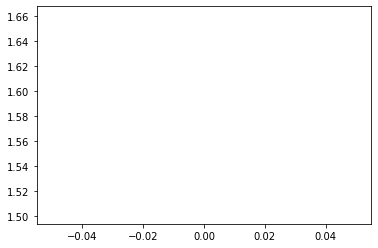

In [ ]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' %(i, n_iters, loss.item()))

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader, vgg), evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()

##With model copies

In [15]:
import copy

In [ ]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 2.02
Iteration: 0/3125, Loss: 2.02
Min loss 2.00
Min loss 1.92
Min loss 1.31
Min loss 1.09
Min loss 1.08
Min loss 1.06
Min loss 1.04
Min loss 0.92
Iteration: 100/3125, Loss: 1.89
Min loss 0.90
Iteration: 200/3125, Loss: 3.16
Iteration: 300/3125, Loss: 1.57
Min loss 0.79
Iteration: 400/3125, Loss: 1.70
Min loss 0.72
Iteration: 500/3125, Loss: 2.66
Iteration: 600/3125, Loss: 2.50
Iteration: 700/3125, Loss: 2.07
Iteration: 800/3125, Loss: 3.18
Min loss 0.60
Iteration: 900/3125, Loss: 3.02
Iteration: 1000/3125, Loss: 1.40
Iteration: 1100/3125, Loss: 3.37
Iteration: 1200/3125, Loss: 2.10
Iteration: 1300/3125, Loss: 2.78
Iteration: 1400/3125, Loss: 3.54
Iteration: 1500/3125, Loss: 1.37
Iteration: 1600/3125, Loss: 2.03
Iteration: 1700/3125, Loss: 2.85
Iteration: 1800/3125, Loss: 2.12
Iteration: 1900/3125, Loss: 2.84
Iteration: 2000/3125, Loss: 1.77
Min loss 0.59
Iteration: 2100/3125, Loss: 2.04
Iteration: 2200/3125, Loss: 2.29
Iteration: 2300/3125, Loss: 2.69
Iteration: 2400/3125, Lo

In [ ]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

46.45 45.47


##ResNet

In [16]:
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [17]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
for param in resnet.parameters():
  param.requires_grad = False

In [20]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [21]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [22]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optimizer.SGD(resnet.parameters(), lr=0.01)

Min loss 2.54
Iteration: 0/3125, Loss: 2.54
Min loss 2.54
Min loss 2.40
Min loss 2.27
Min loss 2.26
Min loss 2.18
Min loss 2.04
Min loss 1.97
Min loss 1.97
Min loss 1.83
Min loss 1.81
Min loss 1.63
Min loss 1.62
Min loss 1.56
Iteration: 100/3125, Loss: 1.96
Min loss 1.36
Min loss 1.34
Iteration: 200/3125, Loss: 1.58
Min loss 1.32
Min loss 1.20
Min loss 1.14
Iteration: 300/3125, Loss: 1.41
Min loss 0.99
Min loss 0.94
Iteration: 400/3125, Loss: 1.41
Min loss 0.78
Iteration: 500/3125, Loss: 1.43
Iteration: 600/3125, Loss: 1.07
Iteration: 700/3125, Loss: 1.48
Iteration: 800/3125, Loss: 1.13
Min loss 0.76
Iteration: 900/3125, Loss: 1.08
Iteration: 1000/3125, Loss: 1.30
Min loss 0.70
Iteration: 1100/3125, Loss: 1.21
Iteration: 1200/3125, Loss: 1.45
Min loss 0.61
Iteration: 1300/3125, Loss: 1.37
Iteration: 1400/3125, Loss: 1.61
Iteration: 1500/3125, Loss: 1.11
Iteration: 1600/3125, Loss: 1.06
Min loss 0.59
Min loss 0.47
Iteration: 1700/3125, Loss: 1.27
Iteration: 1800/3125, Loss: 1.06
Iterati

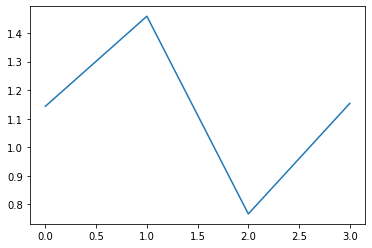

In [23]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 100

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = resnet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(resnet.state_dict())
      print('Min loss %0.2f' % min_loss)
    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
    del inputs, labels, outputs
    torch.cuda.empty_cache()
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader, resnet), evaluation(trainloader, resnet)))
plt.plot(loss_epoch_arr)
plt.show()

In [45]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))


56.95 56.39


##Inception

In [46]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [47]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [48]:
for param in inception.parameters():
  param.requires_grad = False

In [50]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [51]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [52]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [53]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [54]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [55]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True,
                                       transform=transform_train)

Files already downloaded and verified
Files already downloaded and verified


In [56]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [57]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optimizer.SGD(inception.parameters(), lr=0.01)

In [59]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Min loss 3.14
Iteration: 0/3125, Loss: 3.14
Min loss 2.98
Min loss 2.94
Min loss 2.90
Min loss 2.80
Min loss 2.67
Min loss 2.60
Min loss 2.56
Iteration: 100/3125, Loss: 2.72
Min loss 2.48
Min loss 2.47
Min loss 2.47
Min loss 2.32
Min loss 2.32
Iteration: 200/3125, Loss: 2.64
Min loss 2.04
Iteration: 300/3125, Loss: 2.51
Min loss 2.04
Min loss 1.91
Iteration: 400/3125, Loss: 2.56
Min loss 1.90
Min loss 1.85
Min loss 1.75
Iteration: 500/3125, Loss: 2.31
Min loss 1.72
Iteration: 600/3125, Loss: 2.40
Min loss 1.66
Min loss 1.64
Iteration: 700/3125, Loss: 1.64
Min loss 1.58
Iteration: 800/3125, Loss: 2.02
Min loss 1.52
Iteration: 900/3125, Loss: 2.22
Min loss 1.42
Iteration: 1000/3125, Loss: 2.00
Min loss 1.42
Iteration: 1100/3125, Loss: 2.41
Iteration: 1200/3125, Loss: 2.35
Iteration: 1300/3125, Loss: 2.18
Min loss 1.32
Min loss 1.18
Iteration: 1400/3125, Loss: 2.30
Iteration: 1500/3125, Loss: 2.49
Iteration: 1600/3125, Loss: 1.65
Iteration: 1700/3125, Loss: 2.33
Iteration: 1800/3125, Loss

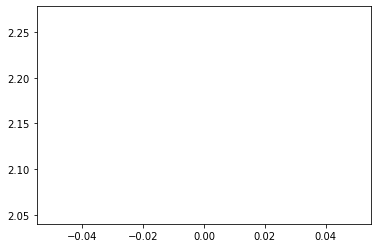

In [60]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs, aux_outputs = inception(inputs)
        loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation_inception(testloader, inception), 
        evaluation_inception(trainloader, inception)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [61]:
inception.load_state_dict(best_model)
print(evaluation_inception(trainloader, inception), evaluation_inception(testloader, inception))

46.782 46.09


##SqueezeNet

In [62]:
sqznet = models.squeezenet1_0(pretrained=True)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


In [63]:
print(sqznet)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [64]:
for param in sqznet.parameters():
  param.requires_grad = False

In [65]:
sqznet.classifier[1] = nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1))
sqznet.classifier[2] = nn.LeakyReLU(inplace=True)
sqznet.classifier[3] = nn.AdaptiveAvgPool2d(output_size=(1, 1))

In [66]:
for param in sqznet.parameters():
  if param.requires_grad :
    print(param.shape)

torch.Size([512, 512, 3, 3])
torch.Size([512])


In [67]:
sqznet = sqznet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optimizer.SGD(sqznet.parameters(), lr=0.01)

Min loss 6.26
Iteration: 0/3125, Loss: 6.26
Min loss 6.24
Iteration: 100/3125, Loss: 6.64
Min loss 5.70
Min loss 5.54
Min loss 5.06
Min loss 4.82
Iteration: 200/3125, Loss: 6.47
Iteration: 300/3125, Loss: 5.54
Min loss 4.42
Min loss 4.10
Iteration: 400/3125, Loss: 5.12
Min loss 3.85
Iteration: 500/3125, Loss: 4.49
Min loss 3.64
Min loss 2.79
Min loss 2.74
Iteration: 600/3125, Loss: 5.20
Min loss 2.29
Min loss 1.81
Iteration: 700/3125, Loss: 4.28
Min loss 1.28
Iteration: 800/3125, Loss: 3.15
Iteration: 900/3125, Loss: 2.10
Min loss 1.28
Iteration: 1000/3125, Loss: 2.33
Min loss 1.25
Min loss 1.18
Min loss 0.99
Iteration: 1100/3125, Loss: 1.75
Iteration: 1200/3125, Loss: 1.68
Iteration: 1300/3125, Loss: 2.19
Min loss 0.98
Min loss 0.89
Iteration: 1400/3125, Loss: 2.08
Min loss 0.82
Iteration: 1500/3125, Loss: 1.53
Iteration: 1600/3125, Loss: 1.95
Iteration: 1700/3125, Loss: 1.62
Iteration: 1800/3125, Loss: 1.30
Iteration: 1900/3125, Loss: 1.48
Iteration: 2000/3125, Loss: 2.82
Iteration: 

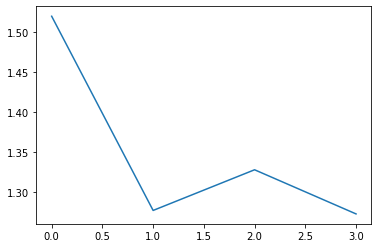

In [70]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 100

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = sqznet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(sqznet.state_dict())
      print('Min loss %0.2f' % min_loss)
    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
    del inputs, labels, outputs
    torch.cuda.empty_cache()
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader, sqznet), evaluation(trainloader, sqznet)))
plt.plot(loss_epoch_arr)
plt.show()

In [72]:
def evaluation(dataloader, model):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct/total

In [74]:
sqznet.load_state_dict(best_model)
print(evaluation(trainloader, sqznet), evaluation(testloader, sqznet))

48.968 48.29
